# ロジスティック回帰
- 分類問題を解くための学習アルゴリズム

## 1.ロジスティック回帰の基本


### ロジスティック回帰のための方程式

$$
y = \sigma(a_1x_1+a_2x_2+ … + a_nx_n +b)
$$

|記号|概要|
|:---:|:---|
|$\sigma$|シグモイド関数|
|$y$|予想結果（0.0～1.0）|
|$x_1$ … $x_n$|説明変数|
|$a_1$ … $a_n$|説明変数の係数|
|$b$|切片|

### sample1
- 実数を0.0から1.0の間に収れんさせる
- シグモイド関数の方程式
$$
\sigma(t) = \frac{1}{1+\mathrm{e}^{-ax}} (a>0)
$$

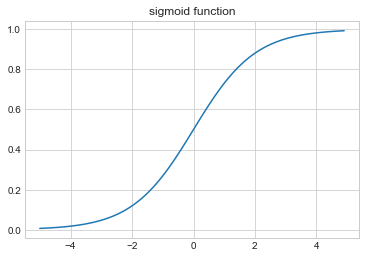

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# スタイルの決定(seaborn-whitegrid)
matplotlib.style.use('seaborn-whitegrid')
# 描画範囲の指定-5.0～5.0まで0.1刻み
x = np.arange(-5, 5, 0.1)
e = math.e
#　シグモイド曲線
y = 1 / (1 + e**-x)

plt.title('sigmoid function')
plt.plot(x, y)
plt.show()

### sample2
- サンプルデータの作成
- make_classification　…　簡単に分類問題用のダミーのサンプルデータを作成出来る関数
- n_samples　…　生成するサンプルの数(70個)
- n_features　…　生成する特徴量の数を表し(2)
- n_redundant　…　分類に不要な特徴量（余分な特徴量）の個数

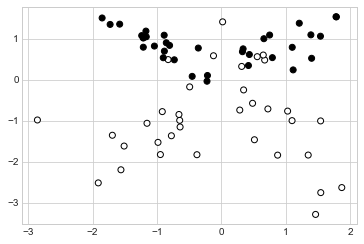

In [2]:
from sklearn.datasets import make_classification
# プロット用モジュール
import matplotlib.pyplot as plt
import numpy as np
# 乱数のシードを0に設定
np.random.seed(0)

# データX, ラベルYを生成
X, Y = make_classification(n_samples=70, n_features=2, n_redundant=0)

# データのプロット
plt.scatter(X[:, 0], X[:, 1], c=Y, marker='o',edgecolor='k')
plt.show()

### sample3
- 説明変数の値（座標の組み合わせ）
- 70個

In [3]:
X

array([[ 0.28518039, -0.74403437],
       [ 0.32659349,  0.67981055],
       [-0.12297467,  0.58108979],
       [ 1.20932498,  1.37510769],
       [-0.85604872,  0.89819842],
       [ 0.74880781,  1.08676752],
       [ 0.43412341,  0.61087772],
       [ 0.87297348, -1.84396778],
       [ 1.09996121,  0.7869903 ],
       [ 0.51278104, -1.46859112],
       [-1.85246067,  1.50305224],
       [ 0.34465167, -0.25288173],
       [-0.22376559, -0.04052758],
       [-1.57978179,  1.35219463],
       [-0.8886773 ,  1.08259327],
       [-1.56023774, -2.20175353],
       [ 0.48400361, -0.57884066],
       [ 1.54055176, -1.00911515],
       [-0.35893441,  0.76900372],
       [-1.91243198, -2.52133431],
       [ 0.67180412,  0.47675586],
       [ 1.02816882, -0.76928552],
       [ 1.11415123,  0.23594796],
       [-0.49283202, -0.17868975],
       [ 1.38980396,  1.09133175],
       [-1.04075161,  0.81731247],
       [-1.51099851, -1.62231296],
       [ 1.7856326 ,  1.5294502 ],
       [-1.15548796,

### sample4
- 目的変数
- 0 or 1

In [4]:
Y

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0])

### sample5
- 学習用、テスト用のデータを7:3に分割

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# 70%のデータを学習データに、30%を検証データにする
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 

### sample6
- 学習用データと検証用データで点の形を描き分ける
- ■・□　…　学習用データ
- ▲・△　…　テスト用データ

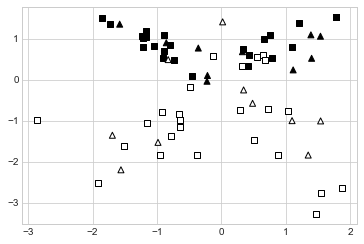

In [6]:
# プロット用モジュール
import matplotlib.pyplot as plt

# データの色付け、プロット
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, marker='s',edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, marker='^',edgecolor='k')
plt.show()

### sample7
- ロジスティック回帰の分析を行う
- 領域を分割する直線の式を得る

In [7]:
# ロジスティック回帰モデルのインスタンスを作成
clf = LogisticRegression() 
 # ロジスティック回帰モデルで学習
clf.fit(X_train,Y_train)
print("coefficient = ", clf.coef_)
print("intercept = ", clf.intercept_)

coefficient =  [[-0.4133635   2.32943118]]
intercept =  [-0.48521383]


### sample8
$${w_0} + {w_1}x + {w_2}y = 0$$
$$w_0 = -0.48521383、w_1 = -0.4133635、w_2 = 2.32943118$$

In [8]:
# 分割する直線の係数を求める
# w_0 + w_1*x + w_2*y = 0
w_0 = clf.intercept_[0]
w_1 = clf.coef_[0,0]
w_2 = clf.coef_[0,1]
print(w_0)
print(w_1)
print(w_2)

-0.48521382706922245
-0.41336349952256174
2.329431178284365


### sample9
- 得られた境界線を描画

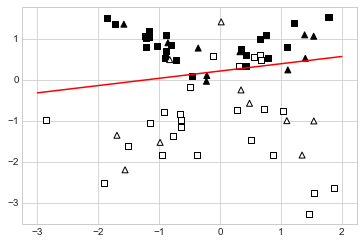

In [9]:
import numpy as np
# データの色付け、プロット
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, marker='s',edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, marker='^',edgecolor='k')
x = np.linspace(-3,2,10)
# 境界線 プロット
plt.plot(x,(-w_1 * x - w_0) / w_2,color="red")

plt.show()

### sample10
- predictメソッドでX_testから予測値の一覧を得る

In [10]:
# X_testの値から予測結果を得る
Y_pred = clf.predict(X_test)
Y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

### sample11
- 実際のY_testの値

In [11]:
# Y_testの値を確認
Y_test

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

### sample12
- Y_predとY_testを比較
- 0:等しい
- 1,-1:異なる値

In [12]:
# Y_predとY_testの差分を比較
Y_pred - Y_test

array([ 0,  1,  0,  0,  0, -1, -1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0])

## 2.混同行列(confisuion matrix)
- 1行1列目の要素は、実際にクラス0で正しくクラス0に分類されたデータ数（真陰性（TN: True Negative））
- 1行2列目の要素は、実際にはクラス0だが誤ってクラス1に分類されたデータ数（偽陽性（FP: False Positive））
- 2行1列目の要素は、実際にはクラス1だが誤ってクラス0に分類されたデータ数（偽陰性（FN: False Negative））
- 2行2列目の要素は、実際にクラス1で正しくクラス1に分類されたデータ数（真陽性（TP: True Positive））

|      | Negative | Positive |
| ---- | ---- | ---- |
| Negative | TN | FP |
| Positive | FN | TP |

### sample13
- 混同行列を得る

In [13]:
# 混同行列（confusion matrix）
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=Y_test, y_pred=Y_pred)

array([[8, 2],
       [3, 8]], dtype=int64)

## 3.正解率（accuracy）
- 分類したデータの総数のうち正しく分類されたデータ数の割合。
- (TP+TN)/(TP+FN+FP+TN)

### sample14
- 正解率の計算
- accuracy_score関数を利用

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=Y_test, y_pred=Y_pred)

0.7619047619047619

## 4.適合率（precision）
- クラス1に分類されたデータのうち、実際にクラス1であるデータ数の割合
- TP/(TP+FP)

### sample15
- 適合率の計算
- precision_score関数を利用

In [15]:
from sklearn.metrics import precision_score
precision_score(y_true=Y_test, y_pred=Y_pred)

0.8

## 5.再現率（recall）
- 実際にクラス1であるデータのうち、クラス1に分類されたデータ数の割合
- TP/(TP+FN)

### sample16
- 再現率の計算
- recall_score関数を利用

In [16]:
from sklearn.metrics import recall_score
recall_score(y_true=Y_test, y_pred=Y_pred)

0.7272727272727273

## 6.F1スコア（F1-score）
- 適合率と再現率の調和平均
- これらのバランスを評価するための指標

### sample17
- F1スコアの計算
- f1_score関数を利用

In [17]:
from sklearn.metrics import f1_score
f1_score(y_true=Y_test, y_pred=Y_pred)

0.761904761904762

## 7.実際のデータでのロジスティック回帰

### sample18
- 乳癌の判定を行うデータを行うデータを利用
- load_breast_cancer関数で読み出し
- df_X　…　説明変数のDataFrame
- df_Y　…　目的変数のDataFrame

In [18]:
import pandas as pd
#scikit-learnより癌のデータを抽出する
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
#癌のデータ（説明変数）
df_X = pd.DataFrame(data=data.data,columns=data.feature_names)
#癌のデータ（目的変数）
df_Y = pd.DataFrame(data=data.target,columns=['判定(0:悪性 / 1:良性)'])
df_X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

### sample19
- 目的変数の値
- 0 … 悪性
- 1 … 良性

In [19]:
#癌のデータ（目的変数）をYに格納する
df_Y.head(10)

判定(0:悪性 / 1:良性)
0                0
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8                0
9                0

### sample20

In [20]:
# 末尾の10行
df_Y.tail(10)

判定(0:悪性 / 1:良性)
559                1
560                1
561                1
562                0
563                0
564                0
565                0
566                0
567                0
568                1

### sample21
- df_Xおよびdf_Yをnumpyの配列にする
- df_Yはraval()で一次元に変換する
- データを学習用とテスト用に7:3で分ける

In [21]:
# 学習用のnumpyのデータに変換
X = df_X.values
Y = df_Y.values.ravel()
# データの分割を行う（訓練用データ 0.7 評価用データ 0.3）
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### sample21
- ロジスティック回帰を行う

In [22]:
# ロジスティク回帰として測定器を作成する
clf = LogisticRegression(max_iter=100000)
# 学習の実施
clf.fit(X_train,Y_train)

LogisticRegression(max_iter=100000)

### sample22
- 評価の実行
- 結果を確率で得る

In [23]:
# 評価の実行（確率）
proba = clf.predict_proba(X_test)
df_prob = pd.DataFrame(data=proba,columns=['確率(悪性)','確率(陽性)'] )
df_prob.head()

確率(悪性)    確率(陽性)
0  0.999964  0.000036
1  0.999999  0.000001
2  0.021385  0.978615
3  0.000194  0.999806
4  0.000062  0.999938

### sample23
- 混同行列を得る

In [24]:
# X_testの値から予測値を得る
Y_pred = clf.predict(X_test)
# 混同行列（confusion matrix）
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=Y_test, y_pred=Y_pred)

array([[70,  3],
       [ 3, 95]], dtype=int64)

### sample24
- 正解率・適合率・再現率・F1スコアの表示

In [25]:
# 各種パラメータの計算
print("正解率:{}".format(accuracy_score(y_true=Y_test, y_pred=Y_pred)))
print("適合率:{}".format(precision_score(y_true=Y_test, y_pred=Y_pred)))
print("再現率:{}".format(recall_score(y_true=Y_test, y_pred=Y_pred)))
print("F1スコア:{}".format(f1_score(y_true=Y_test, y_pred=Y_pred)))

正解率:0.9649122807017544
適合率:0.9693877551020408
再現率:0.9693877551020408
F1スコア:0.9693877551020408


## 8.標準化
- データセットの特徴量間でスケールが異なる場合うまく学習できないということがある。
- 標準化を行ってスケールの違いによる問題を解決する。

### sample25
- 説明データの標準化

In [26]:
# 標準化
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# 標準化のパラメータの取得
stdsc.fit(X)
# 訓練用のデータを標準化
X_train_std = stdsc.transform(X_train)
# 訓練用データを基準にテストデータも標準化
X_test_std = stdsc.transform(X_test)

### sample26
- 学習用データの標準化結果

In [27]:
X_train_std

array([[-0.47069438, -0.4606775 , -0.47447129, ..., -0.14170211,
         0.21717781, -0.40652031],
       [ 3.15048662,  1.30789352,  3.27589644, ...,  2.62040265,
        -0.88291301,  1.17227633],
       [-0.54737821, -0.94936159, -0.57497538, ..., -0.89907307,
        -0.38787214, -0.24027286],
       ...,
       [ 0.28478338,  2.44815641,  0.19528136, ..., -0.74391404,
         0.53749837, -1.23554094],
       [ 0.28194324, -0.60728273,  0.28054508, ...,  0.16130717,
         0.83193444,  0.74557454],
       [ 1.23907108, -0.41180909,  1.20814839, ...,  0.78712033,
        -0.63215701,  0.58209788]])

### sample27
- テスト用データの標準化結果

In [28]:
X_test_std

array([[ 1.27315278,  0.22348024,  1.24110055, ...,  0.52370019,
        -0.90556194, -0.53951827],
       [ 0.39838906,  3.32080658,  0.48320086, ...,  1.32157389,
         0.98885916,  2.02013834],
       [-0.47637467, -0.67011354, -0.37561481, ...,  0.29834655,
         0.53426281,  1.07806944],
       ...,
       [-0.13839777, -0.85860597, -0.1890232 , ..., -0.34086601,
        -0.5998014 , -1.04435637],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       [ 1.16238725, -0.09765502,  1.10105387, ...,  0.95918088,
        -0.14358727, -0.10893737]])

### sample28
- 標準化したデータでの学習

In [29]:
# ロジスティク回帰として測定器を作成する
clf = LogisticRegression(max_iter=100000)
# 学習の実施
clf.fit(X_train_std,Y_train)

LogisticRegression(max_iter=100000)

### sample29
- 標準化したデータでの評価
- 性能が向上したことが確認できる

In [30]:
# X_test_stdの値から予測値を得る
Y_pred_std = clf.predict(X_test_std)
# 混同行列（confusion matrix）
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=Y_test, y_pred=Y_pred_std)

array([[72,  1],
       [ 2, 96]], dtype=int64)

### sample30
- 標準化後の正解率・適合率・再現率・F1スコアの表示

In [31]:
# 各種パラメータの計算
print("正解率:{}".format(accuracy_score(y_true=Y_test, y_pred=Y_pred_std)))
print("適合率:{}".format(precision_score(y_true=Y_test, y_pred=Y_pred_std)))
print("再現率:{}".format(recall_score(y_true=Y_test, y_pred=Y_pred_std)))
print("F1スコア:{}".format(f1_score(y_true=Y_test, y_pred=Y_pred_std)))

正解率:0.9824561403508771
適合率:0.9896907216494846
再現率:0.9795918367346939
F1スコア:0.9846153846153847


### sample31
- **交差検証法（クロスバリデーション:cross validation）**
- 過学習を防ぎ、汎化性能を上げるために行う
- 学習用データと検証用データを2つに分割するのではなく、学習データセットの分割を繰り返し、モデルの構築と評価を複数行う
- k分割交差検証法 … データをk分割、1つを検証用に残りのk-1個を学習用に使用、検証用データを入れ替えながらk回繰り返す
<div style="text-align:center;">
    <b>k=5の場合のk分割交差検証法</b>
    <img src="img/cross_validation.png" width="500px">
</div>

In [32]:
from sklearn.model_selection import cross_val_score
# 交差検証法によるaccuracyを用いた評価
cross_val_score(clf,X,Y,cv = 5,scoring='accuracy')

array([0.93859649, 0.94736842, 0.98245614, 0.92982456, 0.95575221])